In [1]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veselin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data

### Load data

In [76]:
directoryPath = 'Data/elon_musk_twitter/'

data = pd.DataFrame()

for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    data = pd.concat([data,x],axis=0)
    
data.head(3)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1.27568e+12,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,152153637639028736,152151847614943233,1.32511e+12,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,151809315026636800,151809315026636800,1.32503e+12,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploration and Preprocessing

In [77]:
# print information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 1027
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30735 non-null  float64
 1   id               34878 non-null  int64  
 2   conversation_id  34878 non-null  int64  
 3   created_at       34878 non-null  object 
 4   date             34878 non-null  object 
 5   timezone         34878 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            34878 non-null  object 
 8   language         34878 non-null  object 
 9   hashtags         34878 non-null  object 
 10  cashtags         34878 non-null  object 
 11  user_id          34878 non-null  int64  
 12  user_id_str      30735 non-null  float64
 13  username         34878 non-null  object 
 14  name             34878 non-null  object 
 15  day              30735 non-null  float64
 16  hour             30735 non-null  float64
 17  link         

In [78]:
# drop columns with any number of null values
data = data.dropna(axis=1)

In [79]:
# print unique values per column
data.nunique()

id                 15346
conversation_id     8291
created_at         15343
date               12124
timezone               2
tweet              15219
language              36
hashtags              35
cashtags               3
user_id                1
username               1
name                   2
link               15346
urls                1204
photos               904
video                  2
retweet                1
reply_to            6648
dtype: int64

In [80]:
# get relevant columns
data = data[['id', 'conversation_id', 'created_at', 'date', 'tweet', 'language', 'link']]

In [81]:
# drop rows that are duplicate
data = data.drop_duplicates()

In [82]:
# convert column to datetime pandas
data['date'] = pd.to_datetime(data['date'])

In [39]:
# drop unused columns

data = data[['date', 'tweet', 'language', 'tweet_length', 'number_of_tokens', 'sentence_count']]

In [41]:
# remove url, @, &amp;, new line, double spaces, emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in data.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    t = t.strip()
    t = " ".join(t.split())
    t = t.replace(' &amp; ',' ')
    t = remove_emoji(t)
    new.append(t)
    
data['tweet'] = new

In [ ]:
# drop null values
data = data.dropna()

### Feature engeneering

In [83]:
# create new column of tweet length
data['tweet_length'] = data['tweet'].str.len()

In [169]:
# create new column of number of tokens in a tweet
def number_of_tokens(tweet):
    return len(tweet.split())
    
data['number_of_tokens'] = data.tweet.map(lambda tweet:number_of_tokens(tweet))

In [3]:
# number of sentences per tweet
def number_of_sentences(tweet):
    number_of_sentences = sent_tokenize(tweet)
    return len(number_of_sentences)

data = pd.read_csv('Data/elon_mulk_tweets.csv')
data['sentence_count'] = data.tweet.map(lambda tweet:number_of_sentences(tweet))

In [38]:
# save data
data.to_csv('Data/elon_mulk_tweets.csv', index=False)

In [2]:
data = pd.read_csv("Data/elon_mulk_tweets.csv")

## Vizualization

Text(0.5, 1.0, 'Number of tweets per year')

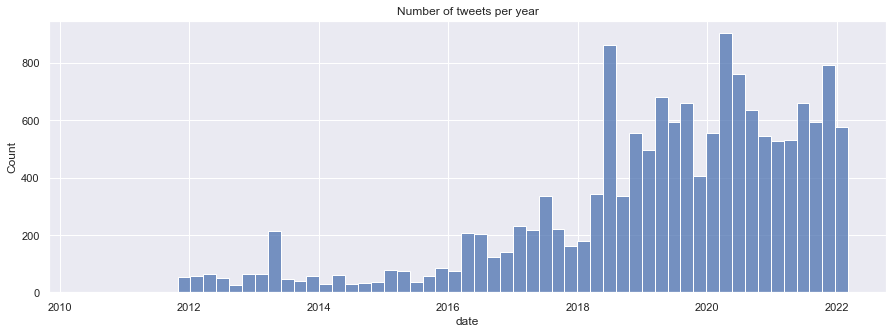

In [182]:
# Plot number  of tweets per year

plt.figure(figsize = (15,5))
sns.histplot(x='date', data=data)
plt.title('Number of tweets per year')

Text(0.5, 1.0, 'Boxplot of tweet length')

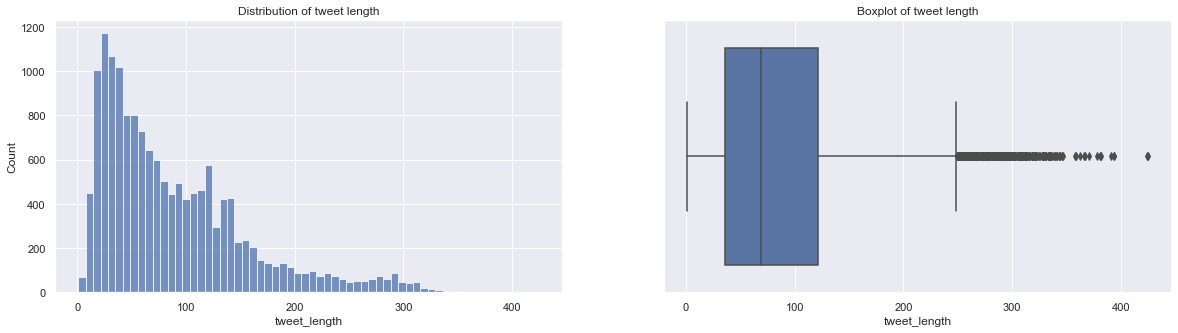

In [122]:
# Vizualize distribution of tweet lengths
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# histplot
sns.histplot(ax=axes[0], x="tweet_length", data=data)
axes[0].set_title('Distribution of tweet length')

# boxplot
sns.boxplot(ax=axes[1], x='tweet_length', data=data)
axes[1].set_title('Boxplot of tweet length')

Text(0.5, 1.0, 'Number of tokens per tweet')

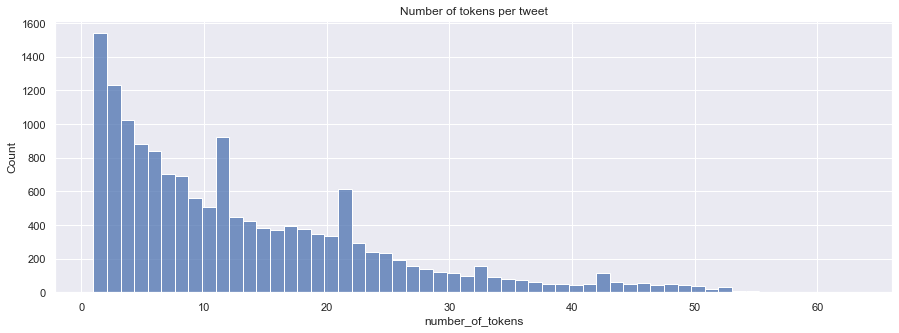

In [3]:
# Plot number of tokens per tweet

plt.figure(figsize = (15,5))
sns.histplot( x='number_of_tokens', data=data)
plt.title('Number of tokens per tweet')

Text(0.5, 1.0, 'Distribution of number of sentences per tweet')

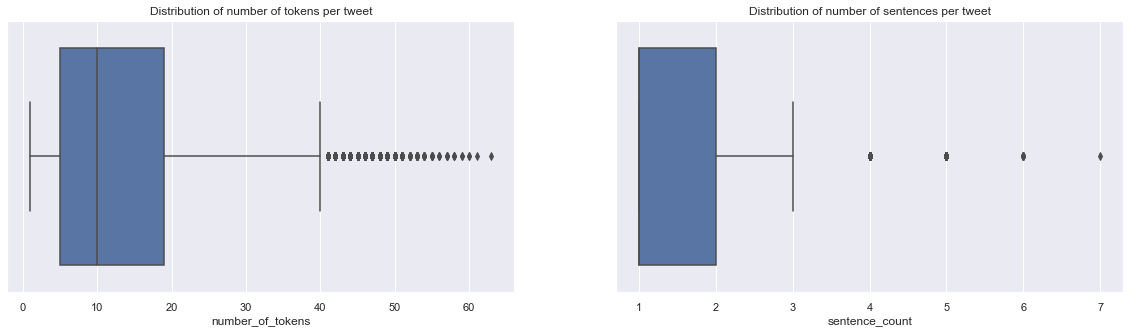

In [8]:
# Plot distribution of number of sentences per tweet and number of tokens per tweet

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# histplot
sns.boxplot(ax=axes[0], x="number_of_tokens", data=data)
axes[0].set_title('Distribution of number of tokens per tweet')

# boxplot
sns.boxplot(ax=axes[1], x='sentence_count', data=data)
axes[1].set_title('Distribution of number of sentences per tweet')

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

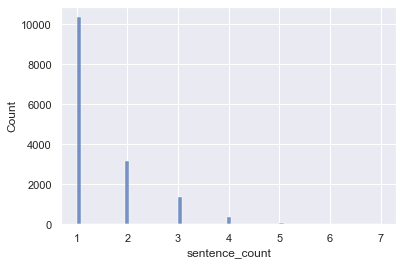

In [10]:
# boxplot
sns.histplot(x='sentence_count', data=data)

In [ ]:
# Plot number of sentences per tweet

plt.figure(figsize = (15,5))
sns.histplot( x='sentence_count', data=data)
plt.title('Number of sentences per tweet')

Text(0.5, 1.0, 'Number of tokens per tweet for undefined language')

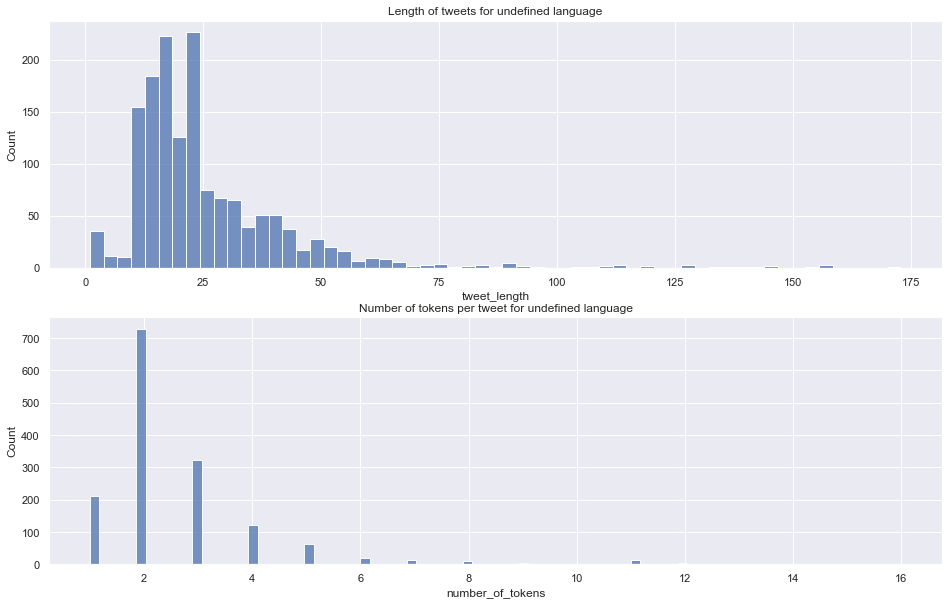

In [177]:
# Plot length of tweets where language is undefined
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

sns.histplot(ax=axes[0],x='tweet_length', data=data.loc[data.language=='und'])
axes[0].set_title('Length of tweets for undefined language')

sns.histplot(ax=axes[1], x='number_of_tokens', data=data.loc[data.language=='und'])
axes[1].set_title('Number of tokens per tweet for undefined language')